<a href="https://colab.research.google.com/github/Batoul-aljaddouh/Animal-Image-Dataset/blob/main/Copy_of_Facemask_Detector_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Karan-Malik/FaceMaskDetector

Cloning into 'FaceMaskDetector'...
remote: Enumerating objects: 1543, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1543 (delta 44), reused 72 (delta 31), pack-reused 1454
Receiving objects: 100% (1543/1543), 84.40 MiB | 30.68 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [ ]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
#from keras.optimizers import adam
from keras.preprocessing import image
import cv2
import datetime

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# BUILDING MODEL TO CLASSIFY BETWEEN MASK AND NO MASK

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
        '/content/FaceMaskDetector/train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

Found 1314 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
        '/content/FaceMaskDetector/test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 194 images belonging to 2 classes.


In [ ]:
model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set,

        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
83/83 [==============================] - 44s 519ms/step - loss: 0.3485 - accuracy: 0.8425 - val_loss: 0.1447 - val_accuracy: 0.9433
Epoch 2/10
83/83 [==============================] - 43s 516ms/step - loss: 0.1580 - accuracy: 0.9414 - val_loss: 0.1121 - val_accuracy: 0.9639
Epoch 3/10
83/83 [==============================] - 43s 516ms/step - loss: 0.1672 - accuracy: 0.9498 - val_loss: 0.1297 - val_accuracy: 0.9742
Epoch 4/10
83/83 [==============================] - 43s 518ms/step - loss: 0.1086 - accuracy: 0.9612 - val_loss: 0.0812 - val_accuracy: 0.9691
Epoch 5/10
83/83 [==============================] - 45s 546ms/step - loss: 0.0776 - accuracy: 0.9696 - val_loss: 0.0858 - val_accuracy: 0.9588
Epoch 6/10
83/83 [==============================] - 58s 702ms/step - loss: 0.0750 - accuracy: 0.9741 - val_loss: 0.0815 - val_accuracy: 0.9742
Epoch 7/10
83/83 [==============================] - 44s 534ms/step - loss: 0.0677 - accuracy: 0.9734 - val_loss: 0.1766 - val_accuracy: 0.9433

In [ ]:
model.save('mymodel.h5',model_saved)

In [ ]:
mymodel=load_model('mymodel.h5')

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_image=image.load_img('/content/WhatsApp Image 2022-09-13 at 11.37.45 AM (5).jpeg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

With Mask


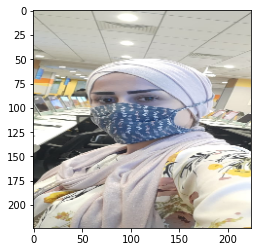

In [ ]:
im = cv2.imread('/content/WhatsApp Image 2022-09-13 at 11.37.45 AM (5).jpeg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
test_image=image.load_img('/content/WhatsApp Image 2022-09-13 at 11.37.45 AM (4).jpeg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

Without Mask


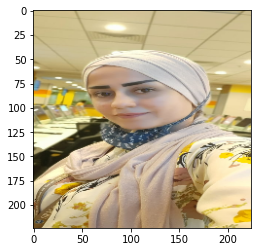

In [ ]:
im = cv2.imread('/content/WhatsApp Image 2022-09-13 at 11.37.45 AM (4).jpeg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Open the device at the ID 0
#cap = cv2.VideoCapture(1)
# Check whether user selected camera is opened successfully.
#if not (cap.isOpened()):
  #print("Could not open video device")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0